## Eksplorasi Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("G:/KULIAH/TUGAS/S05/METPEN/provinsi_jawa.csv", error_bad_lines=False)

b'Skipping line 86: expected 17 fields, saw 18\nSkipping line 377: expected 17 fields, saw 18\nSkipping line 431: expected 17 fields, saw 18\nSkipping line 508: expected 17 fields, saw 18\nSkipping line 578: expected 17 fields, saw 18\nSkipping line 654: expected 17 fields, saw 18\nSkipping line 722: expected 17 fields, saw 18\nSkipping line 739: expected 17 fields, saw 18\nSkipping line 745: expected 17 fields, saw 18\nSkipping line 756: expected 17 fields, saw 18\nSkipping line 757: expected 17 fields, saw 18\nSkipping line 797: expected 17 fields, saw 18\nSkipping line 910: expected 17 fields, saw 18\nSkipping line 912: expected 17 fields, saw 18\nSkipping line 950: expected 17 fields, saw 18\nSkipping line 983: expected 17 fields, saw 18\nSkipping line 1247: expected 17 fields, saw 18\nSkipping line 1492: expected 17 fields, saw 18\nSkipping line 2143: expected 17 fields, saw 18\nSkipping line 2397: expected 17 fields, saw 18\nSkipping line 2423: expected 17 fields, saw 18\nSkippin

In [3]:
df.head(10)

,Serial,Event,Province,District,Date (YMD),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.
0,3678,EARTHQUAKE,DI YOGYAKARTA,BANTUL,2006/5/27,4143,12026,0,78622,0,802804,12026,0,802804,917,94,0
1,3672,EARTHQUAKE,JAWA TENGAH,KLATEN,2006/5/27,1045,18127,0,32277,0,713788,18127,0,713788,298,111,0
2,4250,FLOODS,DKI JAKARTA,KOTA JAKARTA TIMUR,2007/2/1,16,484,0,3022,0,219534,484,0,219534,0,0,0
3,3680,EARTHQUAKE,DI YOGYAKARTA,SLEMAN,2006/5/27,243,4679,0,6186,0,204562,4679,0,204562,446,51,0
4,16970,FLOODS,JAWA BARAT,KARAWANG,2014/1/19,0,0,0,1,0,182830,0,0,182830,0,0,0
5,3679,EARTHQUAKE,DI YOGYAKARTA,GUNUNG KIDUL,2006/5/27,84,1086,0,2957,0,175479,1086,0,175479,428,79,0
6,10218,ERUPTION,DI YOGYAKARTA,SLEMAN,2010/10/26,277,186,0,2346,0,159977,186,0,159977,366,15,0
7,887,FLOODS,DKI JAKARTA,KOTA JAKARTA SELATAN,2002/2/16,0,4897,0,0,0,154270,4897,0,154270,0,0,0
8,3681,EARTHQUAKE,DI YOGYAKARTA,KOTA YOGYAKARTA,2006/5/27,218,318,0,4129,0,145796,318,0,145796,294,30,0
9,4277,FLOODS,JAWA BARAT,BEKASI,2007/2/2,2,0,0,0,0,144866,0,0,144866,0,0,7220


In [4]:
d = pd.to_datetime(df['Date (YMD)']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
del df['Date (YMD)']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial                17432 non-null  int64 
 1   Event                 17432 non-null  object
 2   Province              17432 non-null  object
 3   District              17432 non-null  object
 4   Deaths                17432 non-null  int64 
 5   Injured               17432 non-null  int64 
 6   Missing               17432 non-null  int64 
 7   Houses Destroyed      17432 non-null  int64 
 8   Houses Damaged        17432 non-null  int64 
 9   Directly affected     17432 non-null  int64 
 10  Indirectly Affected   17432 non-null  int64 
 11  Relocated             17432 non-null  int64 
 12  Evacuated             17432 non-null  int64 
 13  Education centers     17432 non-null  int64 
 14  Hospitals             17432 non-null  int64 
 15  Damages in crops Ha.  17432 non-null

In [6]:
df.head()

,Serial,Event,Province,District,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.,year,month,day
0,3678,EARTHQUAKE,DI YOGYAKARTA,BANTUL,4143,12026,0,78622,0,802804,12026,0,802804,917,94,0,2006,5,27
1,3672,EARTHQUAKE,JAWA TENGAH,KLATEN,1045,18127,0,32277,0,713788,18127,0,713788,298,111,0,2006,5,27
2,4250,FLOODS,DKI JAKARTA,KOTA JAKARTA TIMUR,16,484,0,3022,0,219534,484,0,219534,0,0,0,2007,2,1
3,3680,EARTHQUAKE,DI YOGYAKARTA,SLEMAN,243,4679,0,6186,0,204562,4679,0,204562,446,51,0,2006,5,27
4,16970,FLOODS,JAWA BARAT,KARAWANG,0,0,0,1,0,182830,0,0,182830,0,0,0,2014,1,19


### Eksplorasi Berdasar Waktu

D:\APP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

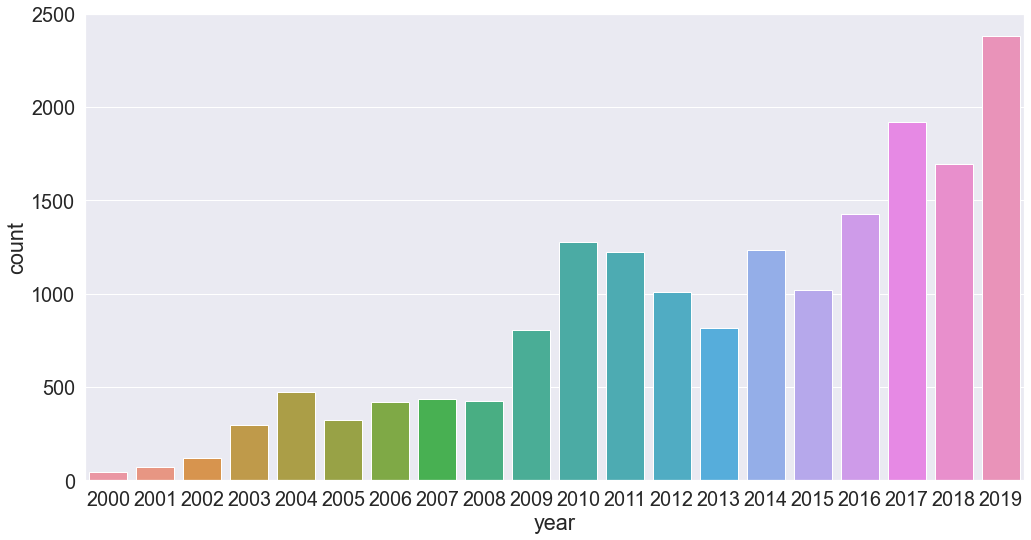

In [122]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.8)
sns.countplot(df["year"])

In [209]:
df[['year','Event']].groupby('year').count().reset_index()

,year,Event
0,2000,47
1,2001,73
2,2002,122
3,2003,295
4,2004,476
5,2005,325
6,2006,418
7,2007,438
8,2008,424
9,2009,808


### Penemuan
- Data sebelum 2010 cenderung rendah mungkin karena tidak terlaporkan

Coba cari berdasarkan bulan

D:\APP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

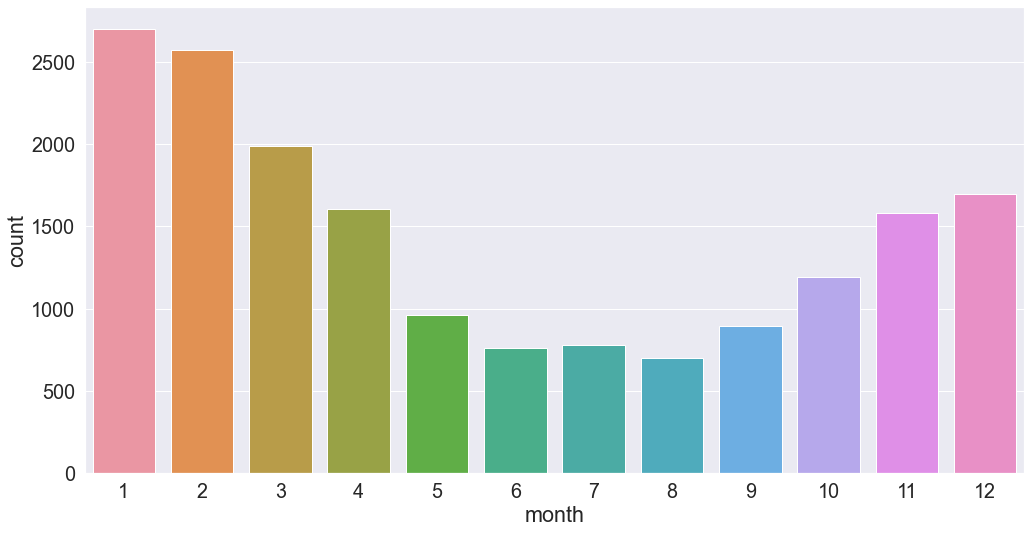

In [123]:
sns.countplot(df["month"])

In [12]:
df.query('month==1 | month==2 | month==3 | month==4 | month==11 | month==12')['Event'].value_counts().reset_index()

,index,Event
0,STRONG WIND,4023
1,FLOODS,3723
2,LANDSLIDES,3700
3,FIRE,349
4,DROUGHT,134
5,FOREST FIRE,61
6,EARTHQUAKE,61
7,TRANSPORTATION ACCIDENT,31
8,SURGE,28
9,ERUPTION,18


In [14]:
df.query('month==5 | month==6 | month==7 | month==8 | month==9 | month==10')['Event'].value_counts().reset_index()

,index,Event
0,DROUGHT,1169
1,STRONG WIND,1036
2,LANDSLIDES,972
3,FLOODS,744
4,FOREST FIRE,596
5,FIRE,486
6,EARTHQUAKE,94
7,SURGE,69
8,TRANSPORTATION ACCIDENT,56
9,ERUPTION,43


In [18]:
penghujan = df.query('month==1 | month==2 | month==3 | month==4 | month==11 | month==12')['Event'].value_counts().reset_index()
print("Jumlah bencana musim penghujan")
print(penghujan['Event'].sum())
kemarau = df.query('month==5 | month==6 | month==7 | month==8 | month==9 | month==10')['Event'].value_counts().reset_index()
print("Jumlah bencana musim kemarau")
print(kemarau['Event'].sum())
print("Rasio penghujan/kemarau")
print(penghujan['Event'].sum()/kemarau['Event'].sum())

Jumlah bencana musim penghujan
12145
Jumlah bencana musim kemarau
5287
Rasio penghujan/kemarau
2.2971439379610366


In [87]:
pd.crosstab(df.Event, df.month)

month,1,2,3,4,5,6,7,8,9,10,11,12
Event,,,,,,,,,,,,
CONFLICT,0,0,2,1,2,1,0,1,3,0,0,1
DROUGHT,37,21,7,18,84,207,283,254,247,94,31,20
EARTHQUAKE,20,3,3,6,22,10,12,20,21,9,7,22
ERUPTION,2,7,2,3,19,13,3,0,1,7,2,2
FIRE,68,48,74,98,72,95,93,86,71,69,34,27
FLOODS,877,940,649,464,258,135,91,44,81,135,283,510
FOREST FIRE,0,0,0,0,2,20,81,149,169,175,55,6
LAINNYA,0,1,0,6,0,0,0,0,0,0,0,0
LANDSLIDES,758,865,579,548,271,135,95,69,137,265,473,477


<AxesSubplot:xlabel='month'>

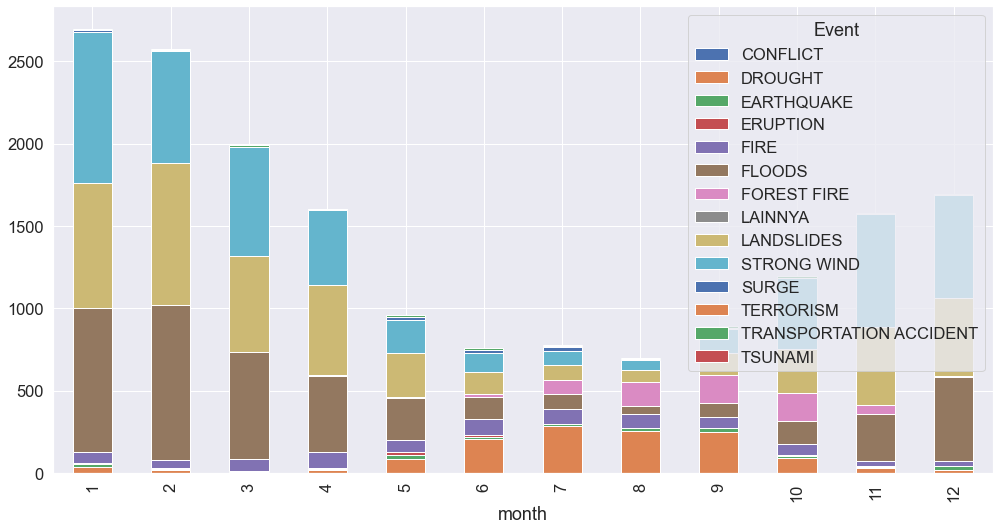

In [126]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
pd.crosstab(df.month, df.Event).plot.bar(stacked=True)

### Penemuan
- Pada musim penghujan (November-April), 3 bencana tertinggi adalah Angin Puting Beliung, Banjir, Tanah Longsor. Jarak jumlah dengan bencana lainnya sangat jauh.
- Pada musim kemarau (Mei-Oktober), bencana tertinggi adalah kekeringan, jarak jumlah bencana 5 bencana teratas tidak terlalu jauh.
- Jumlah bencana saat musim penghujan jauh lebih banyak daripada saat musim kemarau

In [42]:
df[['Event','Deaths']].groupby('Event').sum().reset_index()

,Event,Deaths
0,CONFLICT,8
1,DROUGHT,0
2,EARTHQUAKE,5875
3,ERUPTION,397
4,FIRE,114
5,FLOODS,1497
6,FOREST FIRE,24
7,LAINNYA,0
8,LANDSLIDES,1614
9,STRONG WIND,238


In [43]:
df[['year','Deaths']].groupby('year').sum().reset_index()

,year,Deaths
0,2000,38
1,2001,12
2,2002,163
3,2003,341
4,2004,223
5,2005,213
6,2006,6630
7,2007,353
8,2008,170
9,2009,418


<AxesSubplot:xlabel='year', ylabel='Deaths'>

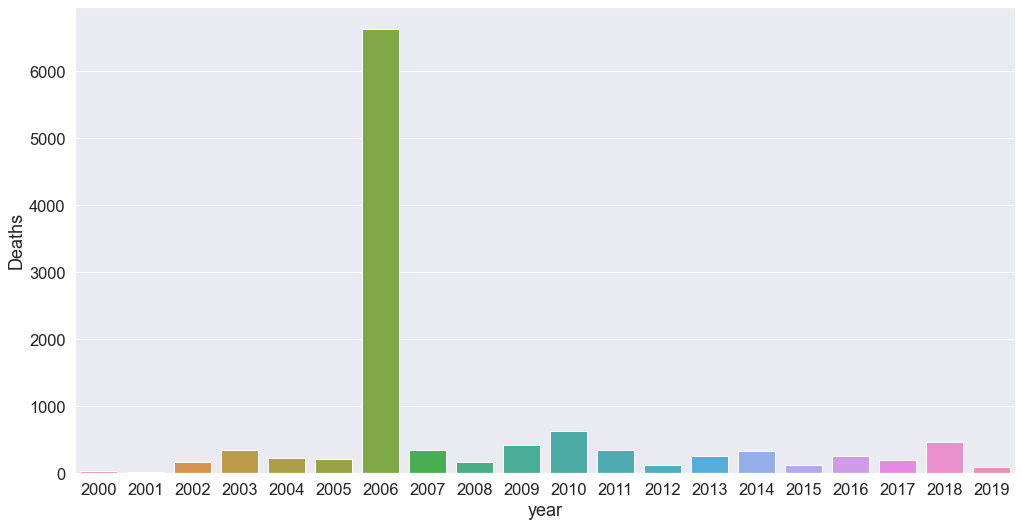

In [127]:
d = df[['year','Deaths']].groupby('year').sum().reset_index()
sns.barplot(x='year', y = 'Deaths', data = d)

In [52]:
df[df.year == 2006][["Event", "Deaths"]].groupby('Event').sum()

,Deaths
Event,
DROUGHT,0
EARTHQUAKE,5773
ERUPTION,2
FIRE,6
FLOODS,153
LANDSLIDES,119
STRONG WIND,6
SURGE,0
TRANSPORTATION ACCIDENT,78


In [62]:
df.query('year == 2006 & Event == "EARTHQUAKE"').reset_index()

,index,Serial,Event,Province,District,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.,year,month,day
0,0,3678,EARTHQUAKE,DI YOGYAKARTA,BANTUL,4143,12026,0,78622,0,802804,12026,0,802804,917,94,0,2006,5,27
1,1,3672,EARTHQUAKE,JAWA TENGAH,KLATEN,1045,18127,0,32277,0,713788,18127,0,713788,298,111,0,2006,5,27
2,3,3680,EARTHQUAKE,DI YOGYAKARTA,SLEMAN,243,4679,0,6186,0,204562,4679,0,204562,446,51,0,2006,5,27
3,5,3679,EARTHQUAKE,DI YOGYAKARTA,GUNUNG KIDUL,84,1086,0,2957,0,175479,1086,0,175479,428,79,0,2006,5,27
4,8,3681,EARTHQUAKE,DI YOGYAKARTA,KOTA YOGYAKARTA,218,318,0,4129,0,145796,318,0,145796,294,30,0,2006,5,27
5,16,3677,EARTHQUAKE,DI YOGYAKARTA,KULON PROGO,22,2179,0,4009,0,74976,2179,0,74976,293,11,0,2006,5,27
6,57,3673,EARTHQUAKE,JAWA TENGAH,SUKOHARJO,3,67,0,644,0,16302,67,0,16302,72,0,0,2006,5,27
7,68,3671,EARTHQUAKE,JAWA TENGAH,BOYOLALI,4,300,0,440,0,12770,300,0,12770,0,0,0,2006,5,27
8,82,3669,EARTHQUAKE,JAWA TENGAH,PURWOREJO,1,4,0,29,0,9806,4,0,9806,113,2,0,2006,5,27
9,119,3670,EARTHQUAKE,JAWA TENGAH,MAGELANG,10,24,0,386,0,5108,24,0,5108,75,1,0,2006,5,27


### Penemuan
- Gempa Jogja 27 mei 2006 merupakan outlier yg menyebabkan banyak sekali kematian
- Kematian tertinggi ada pada tahun 2006

In [78]:
print("Kematian akibat gempa jogja 27 mei 2006")
print(df.query('year == 2006 & month == 5 & day == 27 & Event == "EARTHQUAKE"')["Deaths"].sum())

Kematian akibat gempa jogja 27 mei 2006
5773


In [109]:
df.query('District == "KARAWANG"').sort_values(by = 'Injured', ascending = False)

,Serial,Event,Province,District,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.,year,month,day
13,8994,FLOODS,JAWA BARAT,KARAWANG,1,24496,0,0,0,108479,54251,0,108479,28,6,0,2010,3,18
474,5308,FLOODS,JAWA BARAT,KARAWANG,0,9445,0,0,0,520,17683,0,520,23,0,6388,2008,2,13
17171,8074,STRONG WIND,JAWA BARAT,KARAWANG,0,85,0,0,0,0,85,0,0,1,0,0,2009,11,30
2186,9413,FLOODS,JAWA BARAT,KARAWANG,1,62,0,0,0,0,62,0,0,0,0,0,2010,5,14
15332,3258,STRONG WIND,JAWA BARAT,KARAWANG,0,42,0,0,0,0,42,0,0,0,0,0,2006,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,1770,FLOODS,JAWA BARAT,KARAWANG,2,0,0,0,0,0,94068,0,0,0,0,31607,2004,2,17
6102,17298,FLOODS,JAWA BARAT,KARAWANG,0,0,0,0,0,0,15909,0,0,0,0,0,2014,2,25
5907,16947,FLOODS,JAWA BARAT,KARAWANG,0,0,0,0,0,0,840,0,0,0,0,0,2014,1,17
5884,16885,FLOODS,JAWA BARAT,KARAWANG,0,0,0,0,0,0,24449,0,0,0,0,0,2014,1,13


In [79]:
df["Deaths"].sum()

11411

In [80]:
df.query('year == 2006 & month == 5 & day == 27 & Event == "EARTHQUAKE"')["Deaths"].sum()/df["Deaths"].sum()*100

50.59153448426956

## Seleksi Fitur Data

In [11]:
df[['Province','Deaths', 'Injured', 'Missing']].groupby('Province').sum().reset_index()

,Province,Deaths,Injured,Missing
0,BANTEN,533,23611,228
1,DI YOGYAKARTA,5149,20832,1
2,DKI JAKARTA,350,11286,1
3,JAWA BARAT,1878,67870,221
4,JAWA TENGAH,2470,28505,426
5,JAWA TIMUR,1031,32876,289


In [12]:
df[['Province','Houses Destroyed', 'Houses Damaged', 'Directly affected', 'Indirectly Affected']].groupby('Province').sum().reset_index()

,Province,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected
0,BANTEN,9321,735,220129,1112053
1,DI YOGYAKARTA,99667,425,1599346,522410
2,DKI JAKARTA,20815,318,1106768,976847
3,JAWA BARAT,99538,18078,1412851,7290043
4,JAWA TENGAH,68027,10089,1567967,3231974
5,JAWA TIMUR,32448,13024,375341,3371273


In [13]:
df[['Province','Relocated', 'Evacuated', 'Education centers', 'Hospitals', 'Damages in crops Ha.']].groupby('Province').sum().reset_index()

,Province,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.
0,BANTEN,0,220129,344,6,109957
1,DI YOGYAKARTA,0,1599346,2794,281,24872
2,DKI JAKARTA,0,1106768,11,3,157
3,JAWA BARAT,0,1412851,6745,1084,1482537
4,JAWA TENGAH,0,1567967,1350,223,465256
5,JAWA TIMUR,0,375341,2039,242,234916


In [14]:
m = df[['Province','Event']].groupby('Province').describe().reset_index()
m

Province Event                          
                 count unique          top  freq
0         BANTEN   625     11       FLOODS   237
1  DI YOGYAKARTA   598     11  STRONG WIND   261
2    DKI JAKARTA   438      9       FLOODS   231
3     JAWA BARAT  4615     14   LANDSLIDES  1578
4    JAWA TENGAH  7049     12   LANDSLIDES  2216
5     JAWA TIMUR  4107     13       FLOODS  1332

In [15]:
m.iloc[:,1]

0     625
1     598
2     438
3    4615
4    7049
5    4107
Name: (Event, count), dtype: object

### Penemuan
- Fitur Missing & Houses Damaged terlalu beda jauhnya, dihapus saja
- Fitur Relocated tidak berguna karena hanya 1 nilai
- Fitur education centers, hospitals, dan damages in crops tidak terlalu relevan

In [16]:
df[['Province','District']].groupby('Province').describe().reset_index()

Province District                                
                    count unique                 top freq
0         BANTEN      625      8              SERANG  212
1  DI YOGYAKARTA      598      5              SLEMAN  147
2    DKI JAKARTA      438      6  KOTA JAKARTA TIMUR  122
3     JAWA BARAT     4615     28               BOGOR  693
4    JAWA TENGAH     7049     35             CILACAP  742
5     JAWA TIMUR     4107     38          BOJONEGORO  367

### Persiapan Clustering Provinsi

In [17]:
df_new = df.groupby('Province').sum().reset_index()
df_new

,Province,Serial,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.,year,month,day
0,BANTEN,10392093,533,23611,228,9321,735,220129,1112053,0,220129,344,6,109957,1258037,3725,8046
1,DI YOGYAKARTA,9773328,5149,20832,1,99667,425,1599346,522410,0,1599346,2794,281,24872,1203789,3055,8216
2,DKI JAKARTA,5402596,350,11286,1,20815,318,1106768,976847,0,1106768,11,3,157,880656,2489,6444
3,JAWA BARAT,79449382,1878,67870,221,99538,18078,1412851,7290043,0,1412851,6745,1084,1482537,9290502,26358,63097
4,JAWA TENGAH,124718898,2470,28505,426,68027,10089,1567967,3231974,0,1567967,1350,223,465256,14193088,38260,98990
5,JAWA TIMUR,77597969,1031,32876,289,32448,13024,375341,3371273,0,375341,2039,242,234916,8271712,24494,57343


In [18]:
del df_new["Serial"]
del df_new["Missing"]
del df_new["Houses Damaged"]
del df_new["Relocated"]
del df_new["Education centers"]
del df_new["Hospitals"]
del df_new["Damages in crops Ha."]
del df_new["year"]
del df_new["month"]
del df_new["day"]
df_new.head()

,Province,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated
0,BANTEN,533,23611,9321,220129,1112053,220129
1,DI YOGYAKARTA,5149,20832,99667,1599346,522410,1599346
2,DKI JAKARTA,350,11286,20815,1106768,976847,1106768
3,JAWA BARAT,1878,67870,99538,1412851,7290043,1412851
4,JAWA TENGAH,2470,28505,68027,1567967,3231974,1567967


In [19]:
m = df[['Province','District']].groupby('Province').describe().reset_index()
df_new["Jumlah Kota"] = m.iloc[:,2]
df_new.head()

,Province,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Kota
0,BANTEN,533,23611,9321,220129,1112053,220129,8
1,DI YOGYAKARTA,5149,20832,99667,1599346,522410,1599346,5
2,DKI JAKARTA,350,11286,20815,1106768,976847,1106768,6
3,JAWA BARAT,1878,67870,99538,1412851,7290043,1412851,28
4,JAWA TENGAH,2470,28505,68027,1567967,3231974,1567967,35


In [20]:
m = df[['Province','Event']].groupby('Province').describe().reset_index()
df_new["Jumlah Jenis Bencana"] = m.iloc[:,2]
df_new["Jumlah Total Bencana"] = m.iloc[:,1]
df_new.head()

,Province,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Kota,Jumlah Jenis Bencana,Jumlah Total Bencana
0,BANTEN,533,23611,9321,220129,1112053,220129,8,11,625
1,DI YOGYAKARTA,5149,20832,99667,1599346,522410,1599346,5,11,598
2,DKI JAKARTA,350,11286,20815,1106768,976847,1106768,6,9,438
3,JAWA BARAT,1878,67870,99538,1412851,7290043,1412851,28,14,4615
4,JAWA TENGAH,2470,28505,68027,1567967,3231974,1567967,35,12,7049


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Province              6 non-null      object
 1   Deaths                6 non-null      int64 
 2   Injured               6 non-null      int64 
 3   Houses Destroyed      6 non-null      int64 
 4   Directly affected     6 non-null      int64 
 5   Indirectly Affected   6 non-null      int64 
 6   Evacuated             6 non-null      int64 
 7   Jumlah Kota           6 non-null      object
 8   Jumlah Jenis Bencana  6 non-null      object
 9   Jumlah Total Bencana  6 non-null      object
dtypes: int64(6), object(4)
memory usage: 608.0+ bytes


In [22]:
df_new['Jumlah Kota'] = pd.to_numeric(df_new['Jumlah Kota'])
df_new['Jumlah Jenis Bencana'] = pd.to_numeric(df_new['Jumlah Jenis Bencana'])
df_new['Jumlah Total Bencana'] = pd.to_numeric(df_new['Jumlah Total Bencana'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Province              6 non-null      object
 1   Deaths                6 non-null      int64 
 2   Injured               6 non-null      int64 
 3   Houses Destroyed      6 non-null      int64 
 4   Directly affected     6 non-null      int64 
 5   Indirectly Affected   6 non-null      int64 
 6   Evacuated             6 non-null      int64 
 7   Jumlah Kota           6 non-null      int64 
 8   Jumlah Jenis Bencana  6 non-null      int64 
 9   Jumlah Total Bencana  6 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 608.0+ bytes


In [23]:
df_new_x = df_new.iloc[:,1:10].values
print(df_new_x)

[[    533   23611    9321  220129 1112053  220129       8      11     625]
 [   5149   20832   99667 1599346  522410 1599346       5      11     598]
 [    350   11286   20815 1106768  976847 1106768       6       9     438]
 [   1878   67870   99538 1412851 7290043 1412851      28      14    4615]
 [   2470   28505   68027 1567967 3231974 1567967      35      12    7049]
 [   1031   32876   32448  375341 3371273  375341      38      13    4107]]


In [24]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_new_x)
print(x_scaled)

[[0.03813294 0.21781776 0.         0.         0.08712692 0.
  0.09090909 0.4        0.02828619]
 [1.         0.16870493 1.         1.         0.         1.
  0.         0.4        0.02420209]
 [0.         0.         0.12722201 0.64285678 0.06714859 0.64285678
  0.03030303 0.         0.        ]
 [0.31839967 1.         0.99857216 0.86478197 1.         0.86478197
  0.6969697  1.         0.63182574]
 [0.4417587  0.30430864 0.6497908  0.97724869 0.400371   0.97724869
  0.90909091 0.6        1.        ]
 [0.14190456 0.38155662 0.25598256 0.11253632 0.42095412 0.11253632
  1.         0.8        0.55498412]]


### Elbow

In [25]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

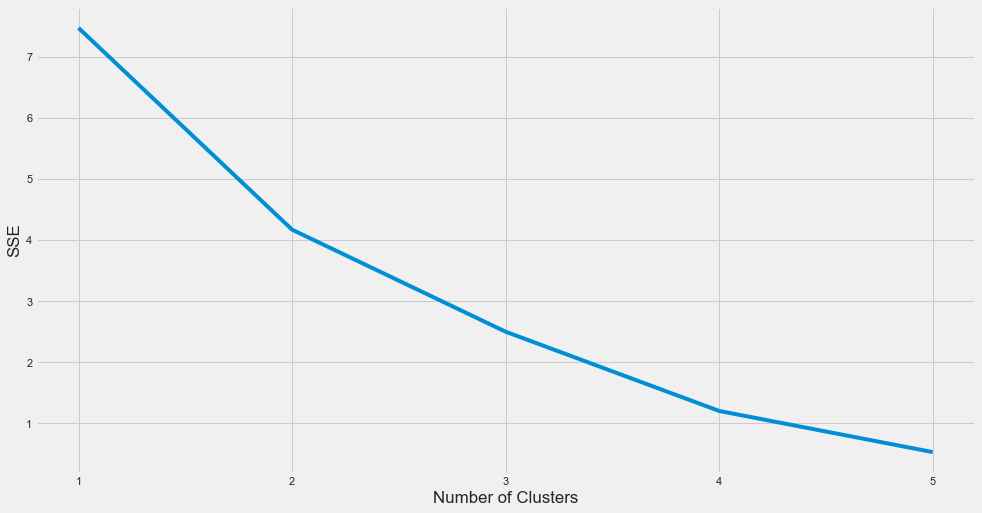

In [26]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 6), sse)
plt.xticks(range(1, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

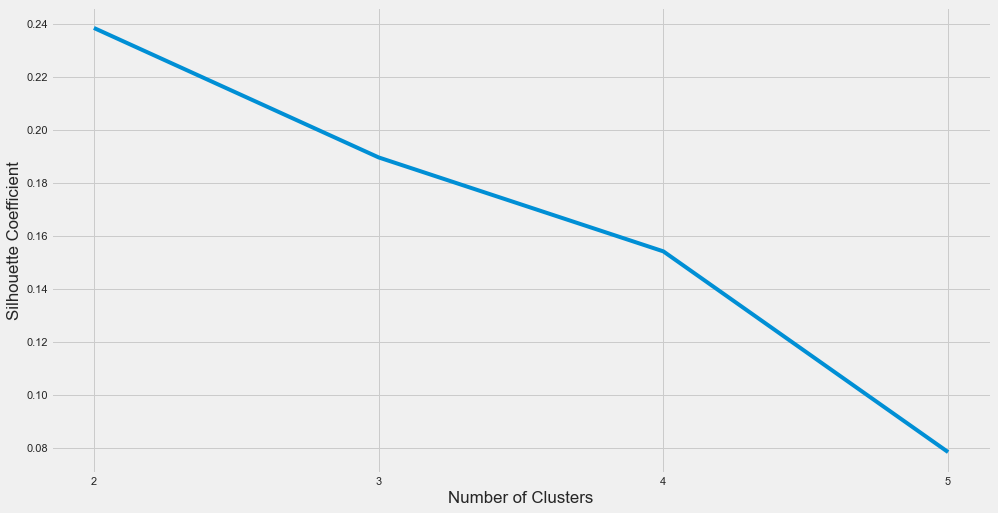

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(x_scaled)
score = silhouette_score(x_scaled, kmeans.labels_)

In [33]:
print(score)

0.23845377183293037


In [36]:
# gap.py
# (c) 2013 Mikael Vejdemo-Johansson
# BSD License
#
# SciPy function to compute the gap statistic for evaluating k-means clustering.
# Gap statistic defined in
# Tibshirani, Walther, Hastie:
#  Estimating the number of clusters in a data set via the gap statistic
#  J. R. Statist. Soc. B (2001) 63, Part 2, pp 411-423

import scipy
import scipy.cluster.vq
import scipy.spatial.distance
dst = scipy.spatial.distance.euclidean

def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    """
    Compute the Gap statistic for an nxm dataset in data.

    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,
    or state the number k of reference distributions in nrefs for automatic generation with a
    uniformed distribution within the bounding box of data.

    Give the list of k-values for which you want to compute the statistic in ks.
    """
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(scipy.diag(tops-bots))

        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs

    gaps = scipy.zeros((len(ks),))
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        refdisps = scipy.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scipy.log(scipy.mean(refdisps))-scipy.log(disp)
    return gaps

In [37]:
gap(x_scaled)

<ipython-input-36-dc57c9dc073d>:30: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  dists = scipy.matrix(scipy.diag(tops-bots))
<ipython-input-36-dc57c9dc073d>:38: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  gaps = scipy.zeros((len(ks),))
<ipython-input-36-dc57c9dc073d>:43: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  refdisps = scipy.zeros((rands.shape[2],))
<ipython-input-36-dc57c9dc073d>:47: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  gaps[i] = scipy.log(scipy.mean(refdisps))-scipy.log(disp)
<ipython-input-36-dc57c9dc073d>:47: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  gaps[i] = scipy.log(scipy.mean(refdisps))-scipy.log(disp)
D:\APP\anaconda3\lib\site-packages\scipy\cl

array([-0.36433963, -0.35246829, -0.4004232 , -0.05626514,  0.11037165,
       -0.06144247, -0.79541378, -0.59838534, -0.38718322, -0.59430612])

In [48]:
def kmeans(num_centers, X):
    centers = np.random.uniform(np.min(X[0]), np.max(X[0]), size=(num_centers, 2))
    
    for _ in range(10):

        assigned_to_clusters = np.zeros(len(X))

        for i, x in enumerate(X):
            closest_center = np.argmin([np.linalg.norm(x - center) for center in centers]) 
            assigned_to_clusters[i] = closest_center

        new_centers = np.array([np.mean(X[assigned_to_clusters == i], axis=0) for i in range(num_centers)])    
        convergence = np.sum(np.abs(new_centers - centers))
        centers = new_centers
    
    return np.array(new_centers), np.array(assigned_to_clusters)

In [49]:
def calculate_Wk(Ks, input_data):
    e = np.finfo(float).eps
    if(len(input_data) == 2):
        X = input_data[0]
        label = input_data[1]
    else:
        X = input_data
    
    Ks = np.arange(1,Ks+1)
    within_cluster_dists = []
    
    for K in Ks:

        dists = 0
        centroids, points = kmeans(K, X)

        for i in range(K):
            cluster_array = X[points == i]
            centroid_dist = [] 
            dist = 0

            if len(cluster_array) > 0:
                for j in range(len(cluster_array)):
                    centroid_dist.append(np.linalg.norm(centroids[i] - cluster_array[j]))

            dist += np.sum(centroid_dist)
            dists += dist + e

        within_cluster_dists.append(np.log(((dists + e) / K)))
        
        normalized_wcd = within_cluster_dists - np.max(within_cluster_dists)
    
    return normalized_wcd

In [50]:
def simulate(iterations, K):
    e = np.finfo(float).eps
    simulated_Wk = np.zeros((iterations, K)) + e 
    simulated_sk = np.zeros((iterations, K)) + e
    
    for i in range(iterations):
        
        temp_wk = []
        temp_sk = []
        
        X = np.random.uniform(0, 1, size=(300, 2))
        
        within_cluster_dists = calculate_Wk(K, X)
                    
        simulated_Wk[i] = within_cluster_dists
        
    Wks = np.mean(simulated_Wk + e, axis=0)
    sks = np.std(simulated_Wk + e, axis=0) * np.sqrt(1 + 1/20)
    
    
    return Wks, sks

In [51]:
def shift_to_one(shift, to_range):
    shifted = np.zeros(to_range)
    shifted[1:] = shift
    shifted[0] = np.nan 
    return shifted

In [52]:
def start_gap_statistics(simulations, Ks, input_data, input_centers):
    
    if(len(input_data) == 2):
        data = input_data[0]
        label = input_data[1]
    else:
        data = input_data
        
    colors = {0: "red", 1: "green", 2: 'blue', 3:'lightblue', 4:'yellow', 5:'pink', 6:'orange', 7:'purple',
         8:'magenta'}
    
    Wks, sks = simulate(simulations, Ks)
    within_cluster_dists = calculate_Wk(Ks, data)
    G = Wks - within_cluster_dists
    
    shifted_wks = shift_to_one(Wks, Ks+1)
    shifted_sks = shift_to_one(sks, Ks+1)
    shifted_g = shift_to_one(G, Ks+1)
    shifted_wcd = shift_to_one(within_cluster_dists, Ks+1)
    
    
    optimum = 0
    
    # THE GAP STATISTICS FORMULA FROM THE SCRIPT
    for i in range(0, len(G) - 1):
        if(G[i] >= G[i+1] + sks[i+1]):
            optimum = i
            break
    
    if optimum == 0:
        optimum = 1
        
    plt.figure(figsize=(16,10))
    
    mapped_colors = [colors[i] for i in label]
    
    # Top Left
    plt.subplot(2, 2, 1)       
    for i, x in enumerate(data):
        plt.scatter(x[0], x[1], color=mapped_colors[i], cmap='rainbow')
    
    for j in range(len(input_centers)):
        plt.scatter(input_centers[j][0], input_centers[j][1], color="black", s=150)
    
    plt.title("Original Data with {} Clusters".format(len(input_centers)))
    
    # Bottom right
    plt.subplot(2, 2, 4)        
    plt.plot(shifted_wcd, '-o', label="Drawn from Data")
    plt.plot(shifted_wks, '-o', color="green", label="Simulated")
    plt.title("Decrease of Within Cluster distance")
    
    # Bottom left
    plt.subplot(2, 2, 3)       
    plt.plot(shifted_g, '-o', color='r')
    plt.axvline(x=optimum, color='black')
    plt.title("Gap Statistics with optimum K at {}".format(optimum))
    
    # Top right    
    plt.subplot(2, 2, 2) 
    center_points, center_arrays = kmeans(optimum, data)
    centers = center_points
    color_array = center_arrays
    color = np.array([colors[x] for x in color_array])
      
    for j in range(optimum):

        points = data[color == colors[j]]
        c = colors[j]

        plt.scatter(points[:,0], points[:,1], color=c, s=20)
        plt.scatter(centers[j][0], centers[j][1], color="black", s=150)
        plt.title("Original Data with optimum {} Clusters".format(optimum))
        
    
    plt.show()

In [53]:
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(x_scaled)
centers = kmeans.cluster_centers_
start_gap_statistics(20, 11, x_scaled, centers)

TypeError: 'KMeans' object is not callable

### Penentuan K
Berdasarkan 2 uji coba ini, ditemukan bahwa k paling optimal adalah 2

[[0.58671946 0.49100452 0.88278765 0.94734355 0.46679033 0.94734355
  0.53535354 0.66666667 0.55200928]
 [0.0600125  0.19979146 0.12773486 0.2517977  0.19174321 0.2517977
  0.37373737 0.4        0.19442344]]


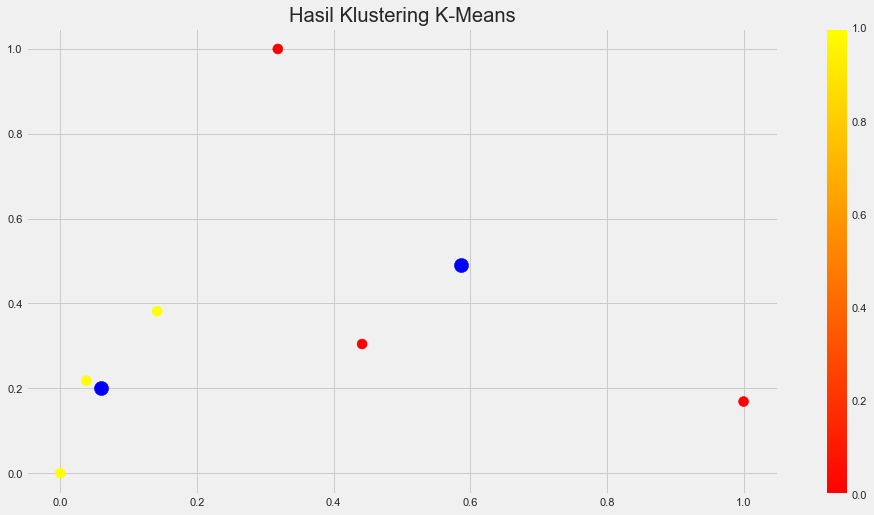

In [102]:
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)
df_new["Kluster"] = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df_new["Kluster"], marker = "o", alpha = 1, cmap='autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [103]:
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

1.0977534175907755

In [104]:
davies_bouldin = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled)
    score = davies_bouldin_score(x_scaled, kmeans.labels_)
    davies_bouldin.append(score)

davies_bouldin

[1.0977534175907755,
 0.7013592427155876,
 0.47997251318915146,
 0.31545470456864744]

In [105]:
df_new

,Province,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Kota,Jumlah Jenis Bencana,Jumlah Total Bencana,Kluster
0,BANTEN,533,23611,9321,220129,1112053,220129,8,11,625,1
1,DI YOGYAKARTA,5149,20832,99667,1599346,522410,1599346,5,11,598,0
2,DKI JAKARTA,350,11286,20815,1106768,976847,1106768,6,9,438,1
3,JAWA BARAT,1878,67870,99538,1412851,7290043,1412851,28,14,4615,0
4,JAWA TENGAH,2470,28505,68027,1567967,3231974,1567967,35,12,7049,0
5,JAWA TIMUR,1031,32876,32448,375341,3371273,375341,38,13,4107,1


In [159]:
df_new.corr()

,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Kota,Jumlah Jenis Bencana,Jumlah Total Bencana,Kluster
Deaths,1.000000,0.021539,0.807825,0.683165,-0.115869,0.683165,-0.130753,0.119009,0.029434,-0.776178
Injured,0.021539,1.000000,0.545713,0.172145,0.957210,0.172145,0.538206,0.886752,0.532327,-0.461103
Houses Destroyed,0.807825,0.545713,1.000000,0.815469,0.457763,0.815469,0.164596,0.488154,0.343051,-0.939251
Directly affected,0.683165,0.172145,0.815469,1.000000,0.196621,1.000000,-0.011744,0.029187,0.290629,-0.864101
Indirectly Affected,-0.115869,0.957210,0.457763,0.196621,1.000000,0.196621,0.682889,0.852430,0.679703,-0.402887
Evacuated,0.683165,0.172145,0.815469,1.000000,0.196621,1.000000,-0.011744,0.029187,0.290629,-0.864101
Jumlah Kota,-0.130753,0.538206,0.164596,-0.011744,0.682889,-0.011744,1.000000,0.766384,0.915048,-0.190314
Jumlah Jenis Bencana,0.119009,0.886752,0.488154,0.029187,0.852430,0.029187,0.766384,1.000000,0.686801,-0.417029
Jumlah Total Bencana,0.029434,0.532327,0.343051,0.290629,0.679703,0.290629,0.915048,0.686801,1.000000,-0.468765
Kluster,-0.776178,-0.461103,-0.939251,-0.864101,-0.402887,-0.864101,-0.190314,-0.417029,-0.468765,1.000000


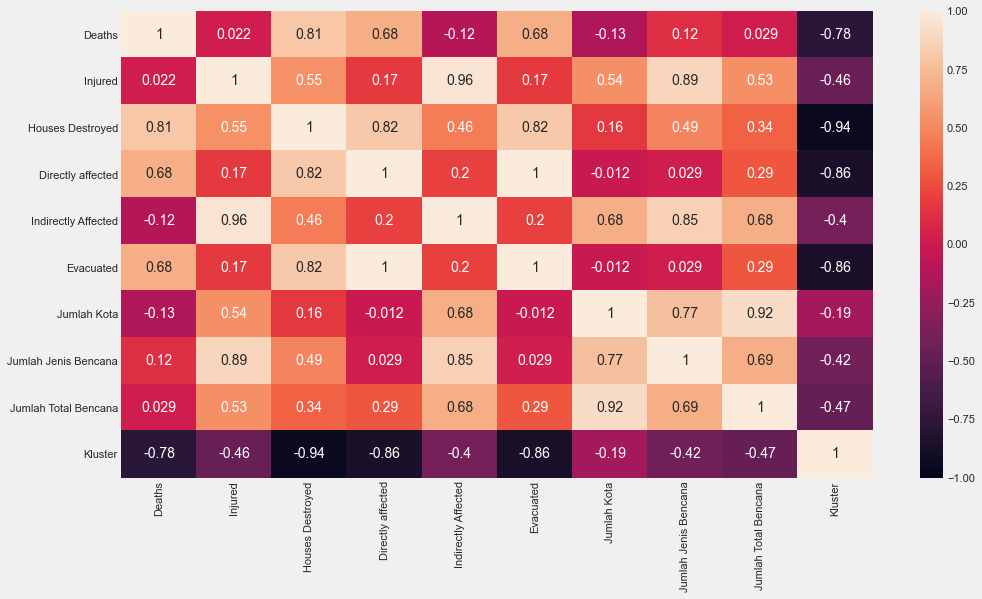

In [160]:
heatmap = sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True)

## Clustering Kota

In [56]:
df_kota = df.groupby('District').sum().reset_index()
df_kota

,District,Serial,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Directly affected,Indirectly Affected,Relocated,Evacuated,Education centers,Hospitals,Damages in crops Ha.,year,month,day
0,ADMINISTRATIF KEPULAUAN SERIBU,131581,59,71,1,183,238,319,1098,0,319,4,1,0,14101,29,106
1,BANDUNG,7350763,173,1385,9,22482,1342,280799,644699,0,280799,1825,8,34252,1060153,2981,7663
2,BANDUNG BARAT,3717841,45,103,6,2540,212,4744,2275620,0,4744,210,0,666,328570,1125,2418
3,BANGKALAN,1190250,4,2,0,201,65,4490,66618,0,4490,37,0,1627,160985,395,1057
4,BANJAR,634951,3,8,0,270,576,238,1092,0,238,8,0,719,88531,260,397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,TRENGGALEK,4579459,149,538,115,447,137,6013,130061,0,6013,78,1,10709,433237,1483,3156
115,TUBAN,2800976,16,2416,9,236,51,32715,437460,0,32715,183,1,25081,318169,859,1855
116,TULUNGAGUNG,2087426,23,22,1,965,112,3,18634,0,3,29,0,5190,257644,775,1804
117,WONOGIRI,8144293,49,55,1,1360,284,8475,84686,0,8475,29,12,33271,938260,2274,6710


In [57]:
del df_kota["Serial"]
del df_kota["Missing"]
del df_kota["Houses Damaged"]
del df_kota["Relocated"]
del df_kota["Education centers"]
del df_kota["Hospitals"]
del df_kota["Damages in crops Ha."]
del df_kota["year"]
del df_kota["month"]
del df_kota["day"]
df_kota.head()

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319
1,BANDUNG,173,1385,22482,280799,644699,280799
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744
3,BANGKALAN,4,2,201,4490,66618,4490
4,BANJAR,3,8,270,238,1092,238


In [58]:
df_kota.head(10)

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319
1,BANDUNG,173,1385,22482,280799,644699,280799
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744
3,BANGKALAN,4,2,201,4490,66618,4490
4,BANJAR,3,8,270,238,1092,238
5,BANJARNEGARA,203,155,1647,19597,26872,19597
6,BANTUL,4161,12082,78735,811036,15771,811036
7,BANYUMAS,38,253,2039,876,84836,876
8,BANYUWANGI,13,52,210,1885,23042,1885
9,BATANG,10,5,305,3586,2705,3586


In [139]:
df_kota.shape

(119, 7)

In [59]:
df[['District', 'Province']].groupby('District').describe().reset_index()

District Province                         
                                       count unique          top freq
0    ADMINISTRATIF KEPULAUAN SERIBU        7      1  DKI JAKARTA    7
1                           BANDUNG      527      1   JAWA BARAT  527
2                     BANDUNG BARAT      163      1   JAWA BARAT  163
3                         BANGKALAN       80      1   JAWA TIMUR   80
4                            BANJAR       44      1   JAWA BARAT   44
..                              ...      ...    ...          ...  ...
114                      TRENGGALEK      215      1   JAWA TIMUR  215
115                           TUBAN      158      1   JAWA TIMUR  158
116                     TULUNGAGUNG      128      1   JAWA TIMUR  128
117                        WONOGIRI      466      1  JAWA TENGAH  466
118                        WONOSOBO      266      1  JAWA TENGAH  266

[119 rows x 5 columns]

In [60]:
m = df[['District','Event']].groupby('District').describe().reset_index()
df_kota["Jumlah Jenis Bencana"] = m.iloc[:,2]
df_kota["Jumlah Total Bencana"] = m.iloc[:,1]
df_kota.head()

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319,2,7
1,BANDUNG,173,1385,22482,280799,644699,280799,9,527
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744,8,163
3,BANGKALAN,4,2,201,4490,66618,4490,6,80
4,BANJAR,3,8,270,238,1092,238,5,44


In [146]:
df_kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District              119 non-null    object
 1   Deaths                119 non-null    int64 
 2   Injured               119 non-null    int64 
 3   Houses Destroyed      119 non-null    int64 
 4   Directly affected     119 non-null    int64 
 5   Indirectly Affected   119 non-null    int64 
 6   Evacuated             119 non-null    int64 
 7   Jumlah Jenis Bencana  119 non-null    object
 8   Jumlah Total Bencana  119 non-null    object
dtypes: int64(6), object(3)
memory usage: 8.5+ KB


In [61]:
df_kota['Jumlah Jenis Bencana'] = pd.to_numeric(df_kota['Jumlah Jenis Bencana'])
df_kota['Jumlah Total Bencana'] = pd.to_numeric(df_kota['Jumlah Total Bencana'])

In [62]:
df_kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District              119 non-null    object
 1   Deaths                119 non-null    int64 
 2   Injured               119 non-null    int64 
 3   Houses Destroyed      119 non-null    int64 
 4   Directly affected     119 non-null    int64 
 5   Indirectly Affected   119 non-null    int64 
 6   Evacuated             119 non-null    int64 
 7   Jumlah Jenis Bencana  119 non-null    int64 
 8   Jumlah Total Bencana  119 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 8.5+ KB


In [63]:
m = df[['District', 'Province']].groupby('District').describe().reset_index()
df_kota["Province"] = m.iloc[:,3]
df_kota.head(10)

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319,2,7,DKI JAKARTA
1,BANDUNG,173,1385,22482,280799,644699,280799,9,527,JAWA BARAT
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744,8,163,JAWA BARAT
3,BANGKALAN,4,2,201,4490,66618,4490,6,80,JAWA TIMUR
4,BANJAR,3,8,270,238,1092,238,5,44,JAWA BARAT
5,BANJARNEGARA,203,155,1647,19597,26872,19597,9,235,JAWA TENGAH
6,BANTUL,4161,12082,78735,811036,15771,811036,7,133,DI YOGYAKARTA
7,BANYUMAS,38,253,2039,876,84836,876,10,408,JAWA TENGAH
8,BANYUWANGI,13,52,210,1885,23042,1885,10,99,JAWA TIMUR
9,BATANG,10,5,305,3586,2705,3586,6,50,JAWA TENGAH


In [64]:
df_kota_x = df_kota.iloc[:,1:9].values
print(df_kota_x)
scaler = MinMaxScaler()
x_scaled_kota = scaler.fit_transform(df_kota_x)
print(x_scaled_kota)

[[     59      71     183     319    1098     319       2       7]
 [    173    1385   22482  280799  644699  280799       9     527]
 [     45     103    2540    4744 2275620    4744       8     163]
 [      4       2     201    4490   66618    4490       6      80]
 [      3       8     270     238    1092     238       5      44]
 [    203     155    1647   19597   26872   19597       9     235]
 [   4161   12082   78735  811036   15771  811036       7     133]
 [     38     253    2039     876   84836     876      10     408]
 [     13      52     210    1885   23042    1885      10      99]
 [     10       5     305    3586    2705    3586       6      50]
 [      2      19      43   15991    6425   15991       5      96]
 [     13   18974    1221  175063  386566  175063       6      98]
 [     25      25      89   24457   47301   24457       7      67]
 [     11      89     312      10  375576      10       5     118]
 [    216     441    3480   14160  476325   14160       8     

### Elbow

In [65]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_kota)
    sse.append(kmeans.inertia_)

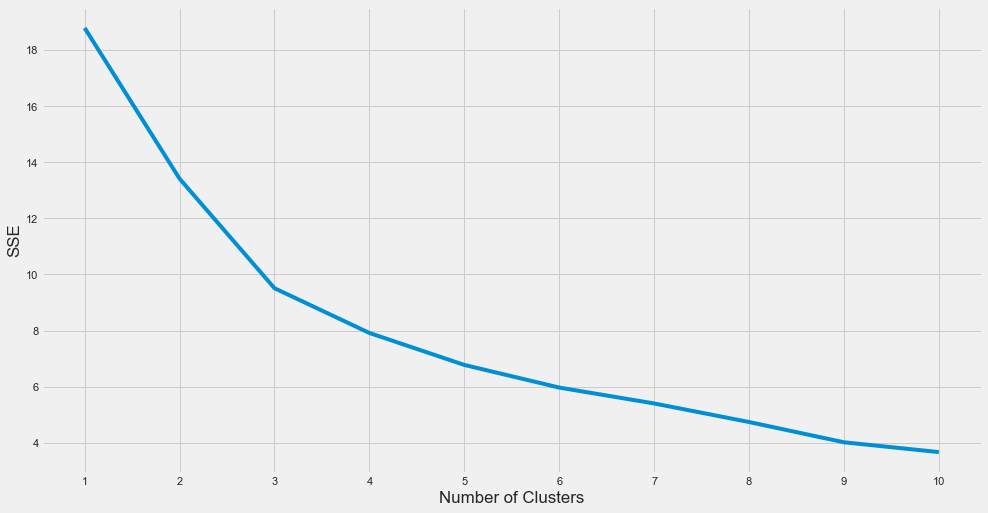

In [66]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette

In [67]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_kota)
    score = silhouette_score(x_scaled_kota, kmeans.labels_)
    silhouette_coefficients.append(score)

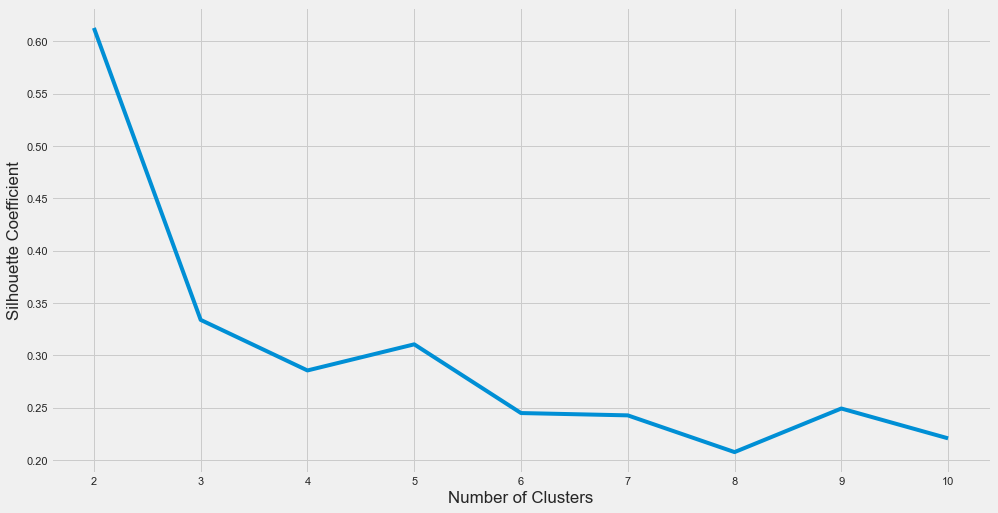

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [83]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(x_scaled_kota)
score = silhouette_score(x_scaled_kota, kmeans.labels_)

In [84]:
score

0.33395119811948126

### Davies Bouldin

In [94]:
davies_bouldin = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_kota)
    score = davies_bouldin_score(x_scaled_kota, labels)
    davies_bouldin.append(score)

davies_bouldin

[0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163,
 0.44887895542727163]

### Penentuan K
Berdasarkan elbow dipilih 3, berdasarkan silhouette dipilih 2, maka akan dicoba dua-duanya

[[0.01261613 0.03866143 0.02372298 0.04767416 0.06185127 0.04767416
  0.45797721 0.19622363]
 [0.63314107 0.44720733 0.70667429 0.9875286  0.00809691 0.9875286
  0.54166667 0.20310391]]


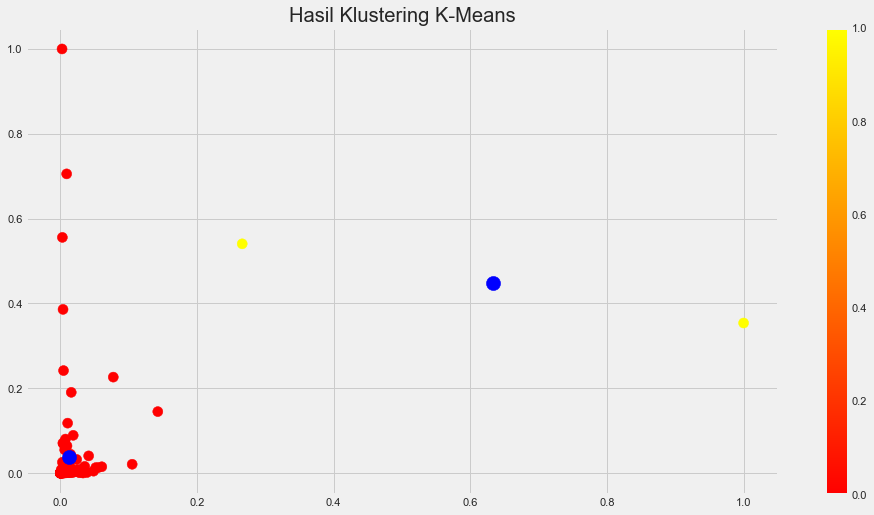

In [114]:
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(x_scaled_kota)
print(kmeans.cluster_centers_)
df_kota["Kluster 2"] = kmeans.labels_
output = plt.scatter(x_scaled_kota[:,0], x_scaled_kota[:,1], s = 100, c = df_kota["Kluster 2"], marker = "o", alpha = 1, cmap='autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [115]:
labels = kmeans.labels_
davies_bouldin_score(x_scaled_kota, labels)

0.44887895542727163

In [89]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled_kota, labels)

0.44887895542727163

[[0.02393208 0.05863642 0.04689767 0.07720968 0.10011977 0.07720968
  0.60658915 0.34306249]
 [0.42297525 0.63147156 0.47240321 0.84979456 0.08845311 0.84979456
  0.5        0.18398561]
 [0.00608718 0.01372631 0.01034422 0.02306211 0.0367436  0.02306211
  0.37100457 0.11042094]]


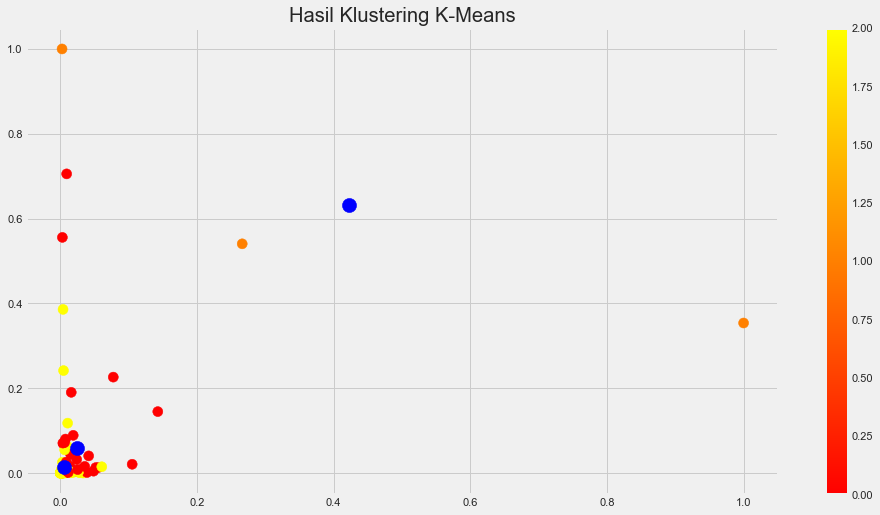

In [112]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled_kota)
print(kmeans.cluster_centers_)
df_kota["Kluster 3"] = kmeans.labels_
output = plt.scatter(x_scaled_kota[:,0], x_scaled_kota[:,1], s = 100, c = df_kota["Kluster 3"], marker = "o", alpha = 1, cmap='autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [113]:
labels = kmeans.labels_
davies_bouldin_score(x_scaled_kota, labels)

1.1147633891993698

In [174]:
df_kota.head(10)

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319,2,7,DKI JAKARTA,0,2
1,BANDUNG,173,1385,22482,280799,644699,280799,9,527,JAWA BARAT,0,0
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744,8,163,JAWA BARAT,0,0
3,BANGKALAN,4,2,201,4490,66618,4490,6,80,JAWA TIMUR,0,2
4,BANJAR,3,8,270,238,1092,238,5,44,JAWA BARAT,0,2
5,BANJARNEGARA,203,155,1647,19597,26872,19597,9,235,JAWA TENGAH,0,0
6,BANTUL,4161,12082,78735,811036,15771,811036,7,133,DI YOGYAKARTA,1,1
7,BANYUMAS,38,253,2039,876,84836,876,10,408,JAWA TENGAH,0,0
8,BANYUWANGI,13,52,210,1885,23042,1885,10,99,JAWA TIMUR,0,0
9,BATANG,10,5,305,3586,2705,3586,6,50,JAWA TENGAH,0,2


In [175]:
df_kota[['Kluster 2','District']].groupby('Kluster 2').count().reset_index()

,Kluster 2,District
0,0,117
1,1,2


In [176]:
df_kota[['Kluster 3','District']].groupby('Kluster 3').count().reset_index()

,Kluster 3,District
0,0,43
1,1,3
2,2,73


In [182]:
df_kota[(df_kota["Kluster 2"] == 1)]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3
6,BANTUL,4161,12082,78735,811036,15771,811036,7,133,DI YOGYAKARTA,1,1
38,KLATEN,1108,18456,32545,831783,21080,831783,8,170,JAWA TENGAH,1,1


In [183]:
df_kota[(df_kota["Kluster 3"] == 0)]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3
1,BANDUNG,173,1385,22482,280799,644699,280799,9,527,JAWA BARAT,0,0
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744,8,163,JAWA BARAT,0,0
5,BANJARNEGARA,203,155,1647,19597,26872,19597,9,235,JAWA TENGAH,0,0
7,BANYUMAS,38,253,2039,876,84836,876,10,408,JAWA TENGAH,0,0
8,BANYUWANGI,13,52,210,1885,23042,1885,10,99,JAWA TIMUR,0,0
11,BEKASI,13,18974,1221,175063,386566,175063,6,98,JAWA BARAT,0,0
14,BOGOR,216,441,3480,14160,476325,14160,8,693,JAWA BARAT,0,0
15,BOJONEGORO,49,128,486,46066,481795,46066,7,367,JAWA TIMUR,0,0
17,BOYOLALI,26,364,1182,81341,50301,81341,8,225,JAWA TENGAH,0,0
18,BREBES,56,71,1804,12650,12279,12650,10,197,JAWA TENGAH,0,0


In [184]:
df_kota[(df_kota["Kluster 3"] == 1)]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3
6,BANTUL,4161,12082,78735,811036,15771,811036,7,133,DI YOGYAKARTA,1,1
34,KARAWANG,11,34143,304,477715,567006,477715,6,109,JAWA BARAT,0,1
38,KLATEN,1108,18456,32545,831783,21080,831783,8,170,JAWA TENGAH,1,1


In [186]:
pd.options.display.max_rows = 100
df_kota[(df_kota["Kluster 3"] == 2)]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319,2,7,DKI JAKARTA,0,2
3,BANGKALAN,4,2,201,4490,66618,4490,6,80,JAWA TIMUR,0,2
4,BANJAR,3,8,270,238,1092,238,5,44,JAWA BARAT,0,2
9,BATANG,10,5,305,3586,2705,3586,6,50,JAWA TENGAH,0,2
10,BATU,2,19,43,15991,6425,15991,5,96,JAWA TIMUR,0,2
12,BLITAR,25,25,89,24457,47301,24457,7,67,JAWA TIMUR,0,2
13,BLORA,11,89,312,10,375576,10,5,118,JAWA TENGAH,0,2
16,BONDOWOSO,23,98,1027,0,73728,0,6,46,JAWA TIMUR,0,2
22,CIMAHI,139,6,95,335,251027,335,4,19,JAWA BARAT,0,2
24,DEMAK,5,11,375,29576,133979,29576,6,112,JAWA TENGAH,0,2


In [194]:
df_kota.groupby('Kluster 3').mean().reset_index()

,Kluster 3,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Kluster 2
0,0,99.581395,2002.023256,3692.488372,64221.697674,227834.558140,64221.697674,8.279070,255.209302,0.000000
1,1,1760.000000,21560.333333,37194.666667,706844.666667,201285.666667,706844.666667,7.000000,137.333333,0.666667
2,2,25.328767,468.657534,814.452055,19182.671233,83614.479452,19182.671233,5.452055,82.821918,0.000000


In [195]:
df_kota.groupby('Kluster 2').mean().reset_index()

,Kluster 2,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Kluster 3
0,0,52.495726,1320.017094,1867.82906,39654.555556,140749.991453,39654.555556,6.495726,146.401709,1.25641
1,1,2634.500000,15269.000000,55640.00000,821409.500000,18425.500000,821409.500000,7.500000,151.500000,1.00000


In [198]:
df_kota.corr()

,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Kluster 2,Kluster 3
Deaths,1.000000,0.279726,0.933498,0.705801,-0.040012,0.705801,0.113979,0.058166,0.839369,-0.118207
Injured,0.279726,1.000000,0.298645,0.593483,0.125054,0.593483,0.113828,-0.018934,0.373565,-0.180665
Houses Destroyed,0.933498,0.298645,1.000000,0.756656,0.009760,0.756656,0.210033,0.185094,0.831583,-0.193247
Directly affected,0.705801,0.593483,0.756656,1.000000,0.076278,1.000000,0.146204,0.064505,0.782261,-0.201810
Indirectly Affected,-0.040012,0.125054,0.009760,0.076278,1.000000,0.076278,0.163577,0.199162,-0.061724,-0.271396
Evacuated,0.705801,0.593483,0.756656,1.000000,0.076278,1.000000,0.146204,0.064505,0.782261,-0.201810
Jumlah Jenis Bencana,0.113979,0.113828,0.210033,0.146204,0.163577,0.146204,1.000000,0.596118,0.064297,-0.672475
Jumlah Total Bencana,0.058166,-0.018934,0.185094,0.064505,0.199162,0.064505,0.596118,1.000000,0.005132,-0.642672
Kluster 2,0.839369,0.373565,0.831583,0.782261,-0.061724,0.782261,0.064297,0.005132,1.000000,-0.034529
Kluster 3,-0.118207,-0.180665,-0.193247,-0.201810,-0.271396,-0.201810,-0.672475,-0.642672,-0.034529,1.000000


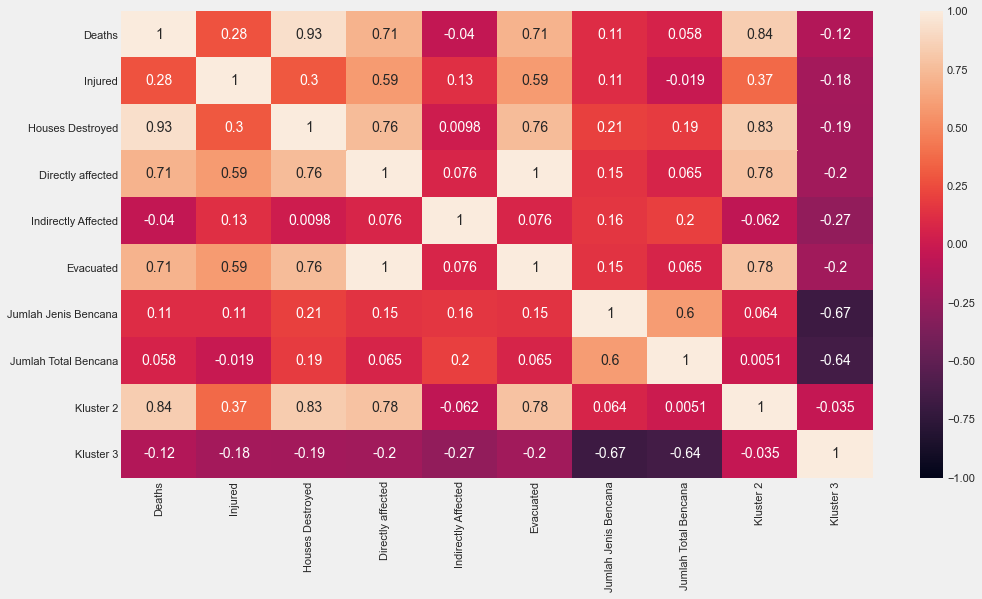

In [199]:
heatmap = sns.heatmap(df_kota.corr(), vmin=-1, vmax=1, annot=True)

In [203]:
df_kota[['Province', 'Kluster 3']].groupby('Province').describe().reset_index()

Province Kluster 3                                             
                     count      mean       std  min  25%  50%  75%  max
0         BANTEN       8.0  1.500000  0.925820  0.0  1.5  2.0  2.0  2.0
1  DI YOGYAKARTA       5.0  1.000000  1.000000  0.0  0.0  1.0  2.0  2.0
2    DKI JAKARTA       6.0  1.333333  1.032796  0.0  0.5  2.0  2.0  2.0
3     JAWA BARAT      27.0  1.222222  0.974022  0.0  0.0  2.0  2.0  2.0
4    JAWA TENGAH      35.0  0.885714  0.993255  0.0  0.0  0.0  2.0  2.0
5     JAWA TIMUR      38.0  1.578947  0.826310  0.0  2.0  2.0  2.0  2.0

In [204]:
df_kota['Kluster 3 String'] = df_kota['Kluster 3'].apply(str)

In [205]:
df_kota[['Province', 'Kluster 3 String']].groupby('Province').describe().reset_index()

Province Kluster 3 String                
                            count unique top freq
0         BANTEN                8      2   2    6
1  DI YOGYAKARTA                5      3   0    2
2    DKI JAKARTA                6      2   2    4
3     JAWA BARAT               27      3   2   16
4    JAWA TENGAH               35      3   0   19
5     JAWA TIMUR               38      2   2   30

In [206]:
pd.crosstab(df_kota['Province'], df_kota['Kluster 3'])

Kluster 3,0,1,2
Province,,,
BANTEN,2,0,6
DI YOGYAKARTA,2,1,2
DKI JAKARTA,2,0,4
JAWA BARAT,10,1,16
JAWA TENGAH,19,1,15
JAWA TIMUR,8,0,30


In [208]:
df_kota.to_csv('iki_su.csv', index=False)

In [210]:
df_kota[(df_kota["District"] == 'KARANGANYAR')]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
33,KARANGANYAR,93,116,2129,3936,66046,3936,7,218,JAWA TENGAH,0,0,0


In [211]:
df_kota[(df_kota["District"] == 'BANYUWANGI')]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
8,BANYUWANGI,13,52,210,1885,23042,1885,10,99,JAWA TIMUR,0,0,0


In [212]:
df_kota[(df_kota["District"] == 'NGANJUK')]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
81,NGANJUK,9,61,110,10,11324,10,6,163,JAWA TIMUR,0,2,2


In [218]:
df_kota[(df_kota["District"] == 'KLATEN')]

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
38,KLATEN,1108,18456,32545,831783,21080,831783,8,170,JAWA TENGAH,1,1,1


In [227]:
df_kota.iloc[0:2,2]

0      71
1    1385
Name: Injured, dtype: int64

In [225]:
df_kota.head()

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
0,ADMINISTRATIF KEPULAUAN SERIBU,59,71,183,319,1098,319,2,7,DKI JAKARTA,0,2,2
1,BANDUNG,173,1385,22482,280799,644699,280799,9,527,JAWA BARAT,0,0,0
2,BANDUNG BARAT,45,103,2540,4744,2275620,4744,8,163,JAWA BARAT,0,0,0
3,BANGKALAN,4,2,201,4490,66618,4490,6,80,JAWA TIMUR,0,2,2
4,BANJAR,3,8,270,238,1092,238,5,44,JAWA BARAT,0,2,2


In [239]:
df_new.groupby('Kluster').mean().reset_index()

,Kluster,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Kota,Jumlah Jenis Bencana,Jumlah Total Bencana
0,0,3165.666667,39069.0,89077.333333,1.526721e+06,3.681476e+06,1.526721e+06,22.666667,12.333333,4087.333333
1,1,638.000000,22591.0,20861.333333,5.674127e+05,1.820058e+06,5.674127e+05,17.333333,11.000000,1723.333333


In [247]:
df_kota[(df_kota["Kluster 3"] == 2)].sort_values(by = 'Province')

,District,Deaths,Injured,Houses Destroyed,Directly affected,Indirectly Affected,Evacuated,Jumlah Jenis Bencana,Jumlah Total Bencana,Province,Kluster 2,Kluster 3,Kluster 3 String
43,KOTA CILEGON,35,110,13,1411,19645,1411,6,25,BANTEN,0,2,2
110,TANGERANG SELATAN,0,0,0,143,47845,143,2,6,BANTEN,0,2,2
109,TANGERANG,111,78,1263,33926,287217,33926,8,64,BANTEN,0,2,2
61,KOTA SERANG,0,4,35,3088,19160,3088,5,22,BANTEN,0,2,2
65,KOTA TANGERANG,17,13178,0,36659,96821,36659,5,21,BANTEN,0,2,2
73,LEBAK,21,58,1664,10357,127906,10357,7,162,BANTEN,0,2,2
68,KOTA YOGYAKARTA,253,510,4155,149081,913,149081,6,56,DI YOGYAKARTA,0,2,2
70,KULON PROGO,41,2191,4225,75981,19454,75981,7,136,DI YOGYAKARTA,0,2,2
50,KOTA JAKARTA UTARA,45,4022,3336,113547,147444,113547,7,70,DKI JAKARTA,0,2,2
47,KOTA JAKARTA PUSAT,43,111,2684,94734,51364,94734,6,52,DKI JAKARTA,0,2,2


In [256]:
# for x in df_kota[(df_kota["Kluster 3"] == 2) & (df_kota["Province"] == "JAWA BARAT")]:
#     print(x)
for index, row in df_kota[(df_kota["Kluster 3"] == 2) & (df_kota["Province"] == "JAWA BARAT")].iterrows():
    print(row['District'].title() + ", ", end="")

Banjar, Cimahi, Indramayu, Kota Bandung, Kota Bekasi, Kota Bogor, Kota Cirebon, Kota Depok, Kota Sukabumi, Kota Tasikmalaya, Kuningan, Majalengka, Pangandaran, Purwakarta, Subang, Sumedang, 

In [257]:
for index, row in df_kota[(df_kota["Kluster 3"] == 2) & (df_kota["Province"] == "JAWA TENGAH")].iterrows():
    print(row['District'].title() + ", ", end="")

Batang, Blora, Demak, Grobogan, Kendal, Kota Magelang, Kota Pekalongan, Kota Salatiga, Kota Surakarta, Kota Tegal, Kudus, Purbalingga, Rembang, Sukoharjo, Tegal, 

In [258]:
for index, row in df_kota[(df_kota["Kluster 3"] == 2) & (df_kota["Province"] == "JAWA TIMUR")].iterrows():
    print(row['District'].title() + ", ", end="")

Bangkalan, Batu, Blitar, Bondowoso, Gresik, Jombang, Kediri, Kota Blitar, Kota Kediri, Kota Madiun, Kota Malang, Kota Mojokerto, Kota Pasuruan, Kota Probolinggo, Kota Surabaya, Lamongan, Madiun, Magetan, Mojokerto, Nganjuk, Ngawi, Pacitan, Pamekasan, Pasuruan, Ponorogo, Probolinggo, Sampang, Sidoarjo, Sumenep, Tulungagung, 

In [259]:
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "BANTEN")].iterrows():
    print(row['District'].title() + ", ", end="")

Pandeglang, Serang, 

In [261]:
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "DI YOGYAKARTA")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "DKI JAKARTA")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "JAWA BARAT")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "JAWA TENGAH")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 0) & (df_kota["Province"] == "JAWA TIMUR")].iterrows():
    print(row['District'].title() + ", ", end="")
print()

Gunung Kidul, Sleman, 
Kota Jakarta Selatan, Kota Jakarta Timur, 
Bandung, Bandung Barat, Bekasi, Bogor, Ciamis, Cianjur, Cirebon, Garut, Sukabumi, Tasikmalaya, 
Banjarnegara, Banyumas, Boyolali, Brebes, Cilacap, Jepara, Karanganyar, Kebumen, Kota Semarang, Magelang, Pati, Pekalongan, Pemalang, Purworejo, Semarang, Sragen, Temanggung, Wonogiri, Wonosobo, 
Banyuwangi, Bojonegoro, Jember, Lumajang, Malang, Situbondo, Trenggalek, Tuban, 


In [262]:
for index, row in df_kota[(df_kota["Kluster 3"] == 1) & (df_kota["Province"] == "DI YOGYAKARTA")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 1) & (df_kota["Province"] == "DKI JAKARTA")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 1) & (df_kota["Province"] == "JAWA BARAT")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 1) & (df_kota["Province"] == "JAWA TENGAH")].iterrows():
    print(row['District'].title() + ", ", end="")
print()
for index, row in df_kota[(df_kota["Kluster 3"] == 1) & (df_kota["Province"] == "JAWA TIMUR")].iterrows():
    print(row['District'].title() + ", ", end="")
print()

Bantul, 

Karawang, 
Klaten, 

